# Decision Tree

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [24]:
Data = pd.read_csv('D:\College\Design of Programming Language(ML)\ML4\Titanic-Dataset.csv')
df = pd.DataFrame(Data)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,PassengerId,int64,891,0
1,Survived,int64,2,0
2,Pclass,int64,3,0
3,Name,object,891,0
4,Sex,object,2,0
5,Age,float64,88,177
6,SibSp,int64,7,0
7,Parch,int64,7,0
8,Ticket,object,681,0
9,Fare,float64,248,0


In [27]:
columns_to_drop = ['Name', 'Ticket', 'PassengerId']
df = df.drop(columns=columns_to_drop)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### Scenario 1: Training the model without 'Age' Column

In [29]:
df2 = df.drop(columns=['Cabin', 'Age'])

In [30]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [31]:
# 1. Separate independent and dependent values
X = df2.drop(columns=['Survived'])  # Independent variables
y = df2['Survived']                # Dependent variable

In [32]:
# 2. Use normalization if needed (normalize Fare as an example)
scaler = StandardScaler()
X['Fare'] = scaler.fit_transform(X[['Fare']])

In [33]:
# 3. Convert columns that have categorical data to categorical
# Encode 'Sex' and 'Embarked' using LabelEncoder
categorical_columns = ['Sex', 'Embarked']
encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column].fillna('Unknown'))  # Fill missing values in 'Embarked'

In [34]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,1,0,-0.502445,2
1,1,0,1,0,0.786845,0
2,3,0,0,0,-0.488854,2
3,1,0,1,0,0.420730,2
4,3,1,0,0,-0.486337,2
...,...,...,...,...,...,...
886,2,1,0,0,-0.386671,2
887,1,0,0,0,-0.044381,2
888,3,0,1,2,-0.176263,2
889,1,1,0,0,-0.044381,0


In [35]:
# 4. Train a Decision Tree model on the data
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree model:", accuracy)

Accuracy of Decision Tree model: 0.7877094972067039


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



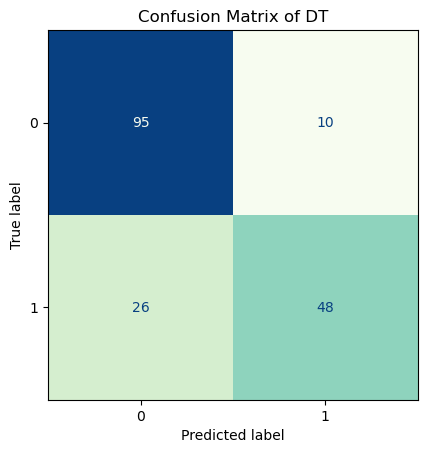

In [98]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of DT')
plt.grid(False)

### Scenario 2: Training the model with 'Age' Column and fill the missing values

In [41]:
df_cleaned2 = df.copy()

In [42]:
df_cleaned2 = df_cleaned2.drop(columns=['Cabin'])

In [43]:
categorical_columns = ['Sex', 'Embarked']
encoder = LabelEncoder()
for column in categorical_columns:
    df_cleaned2[column] = encoder.fit_transform(df_cleaned2[column].fillna('Unknown'))  # Fill missing values in 'Embarked'

#### A) Mean/Median/Mode Imputation

In [43]:
# Fill missing values with the median of the column
#df_cleaned2['Age'].fillna(df_cleaned2['Age'].median(), inplace=True) # Achived accuracy = 0.7821
#df_cleaned2['Age'].fillna(df_cleaned2['Age'].mean(), inplace=True) # Achived accuracy = 0.7821
#df_cleaned2['Age'].fillna(df_cleaned2['Age'].mode(), inplace=True) # Achived accuracy = 0.7821

 The Achived accuracy for all of them was 0.7821

#### B) Forward Fill or Backward Fill

In [65]:
# Forward and Backward fill missing values
#df_cleaned2['Age'].fillna(method='ffill', inplace=True) # Achived accuracy  = 0.7821
#df_cleaned2['Age'].fillna(method='bfill', inplace=True) # Achived accuracy = 0.7821

 The Achived accuracy for all of them was 0.7821

#### C) Imputation with a Specific Value

In [88]:
# Fill missing values with a specific value (e.g., 0)
#df_cleaned2['Age'].fillna(0, inplace=True) # Accuracy = 0.7821

The Achived accuracy was 0.7821

#### D) Imputation Using the SimpleImputer Model

In [44]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the column and transform it
df_cleaned2['Age']= imputer.fit_transform(df[['Age']]) #79.31

The Achived accuracy was 0.7931 so we choosed this method for filling the missing valuse

In [45]:
df_cleaned2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [71]:
# 1. Separate independent and dependent values
X = df_cleaned2.drop(columns=['Survived'])  # Independent variables
y = df_cleaned2['Survived']                # Dependent variable

In [72]:
# 2. Use normalization if needed (normalize Fare as an example)
scaler = StandardScaler()
X['Fare'] = scaler.fit_transform(X[['Fare']])

In [73]:
# 3. Convert columns that have categorical data to categorical
# Encode 'Sex' and 'Embarked' using LabelEncoder
categorical_columns = ['Sex', 'Embarked']
encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column].fillna('Unknown'))  # Fill missing values in 'Embarked'

In [74]:
# 4. Train a Decision Tree model on the data
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize and train Decision Tree
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
# Predict and evaluate
y_pred = model2.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree model:", accuracy)

Accuracy of Decision Tree model: 0.7932960893854749


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



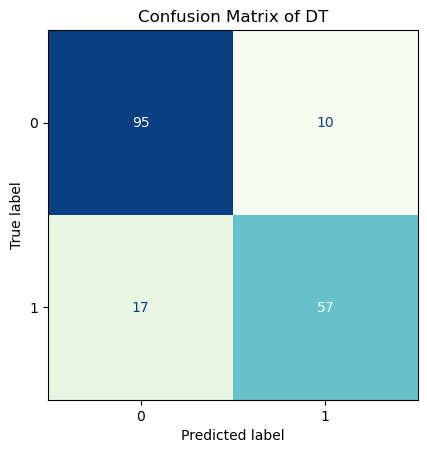

In [99]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of DT')
plt.grid(False)

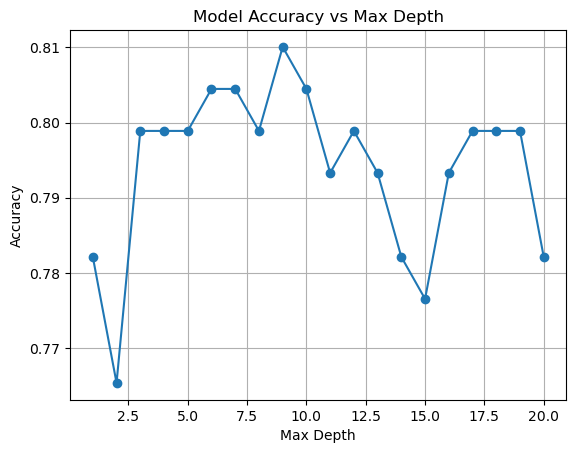

In [79]:
# 6. Show how the max_depth parameter of the model changes by changing the hyperparameter
depths = range(1, 21)
accuracy_by_depth = []

for depth in depths:
    model2 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy_by_depth.append(accuracy_score(y_test, y_pred))

plt.plot(depths, accuracy_by_depth, marker='o')
plt.title('Model Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [80]:
from sklearn import tree

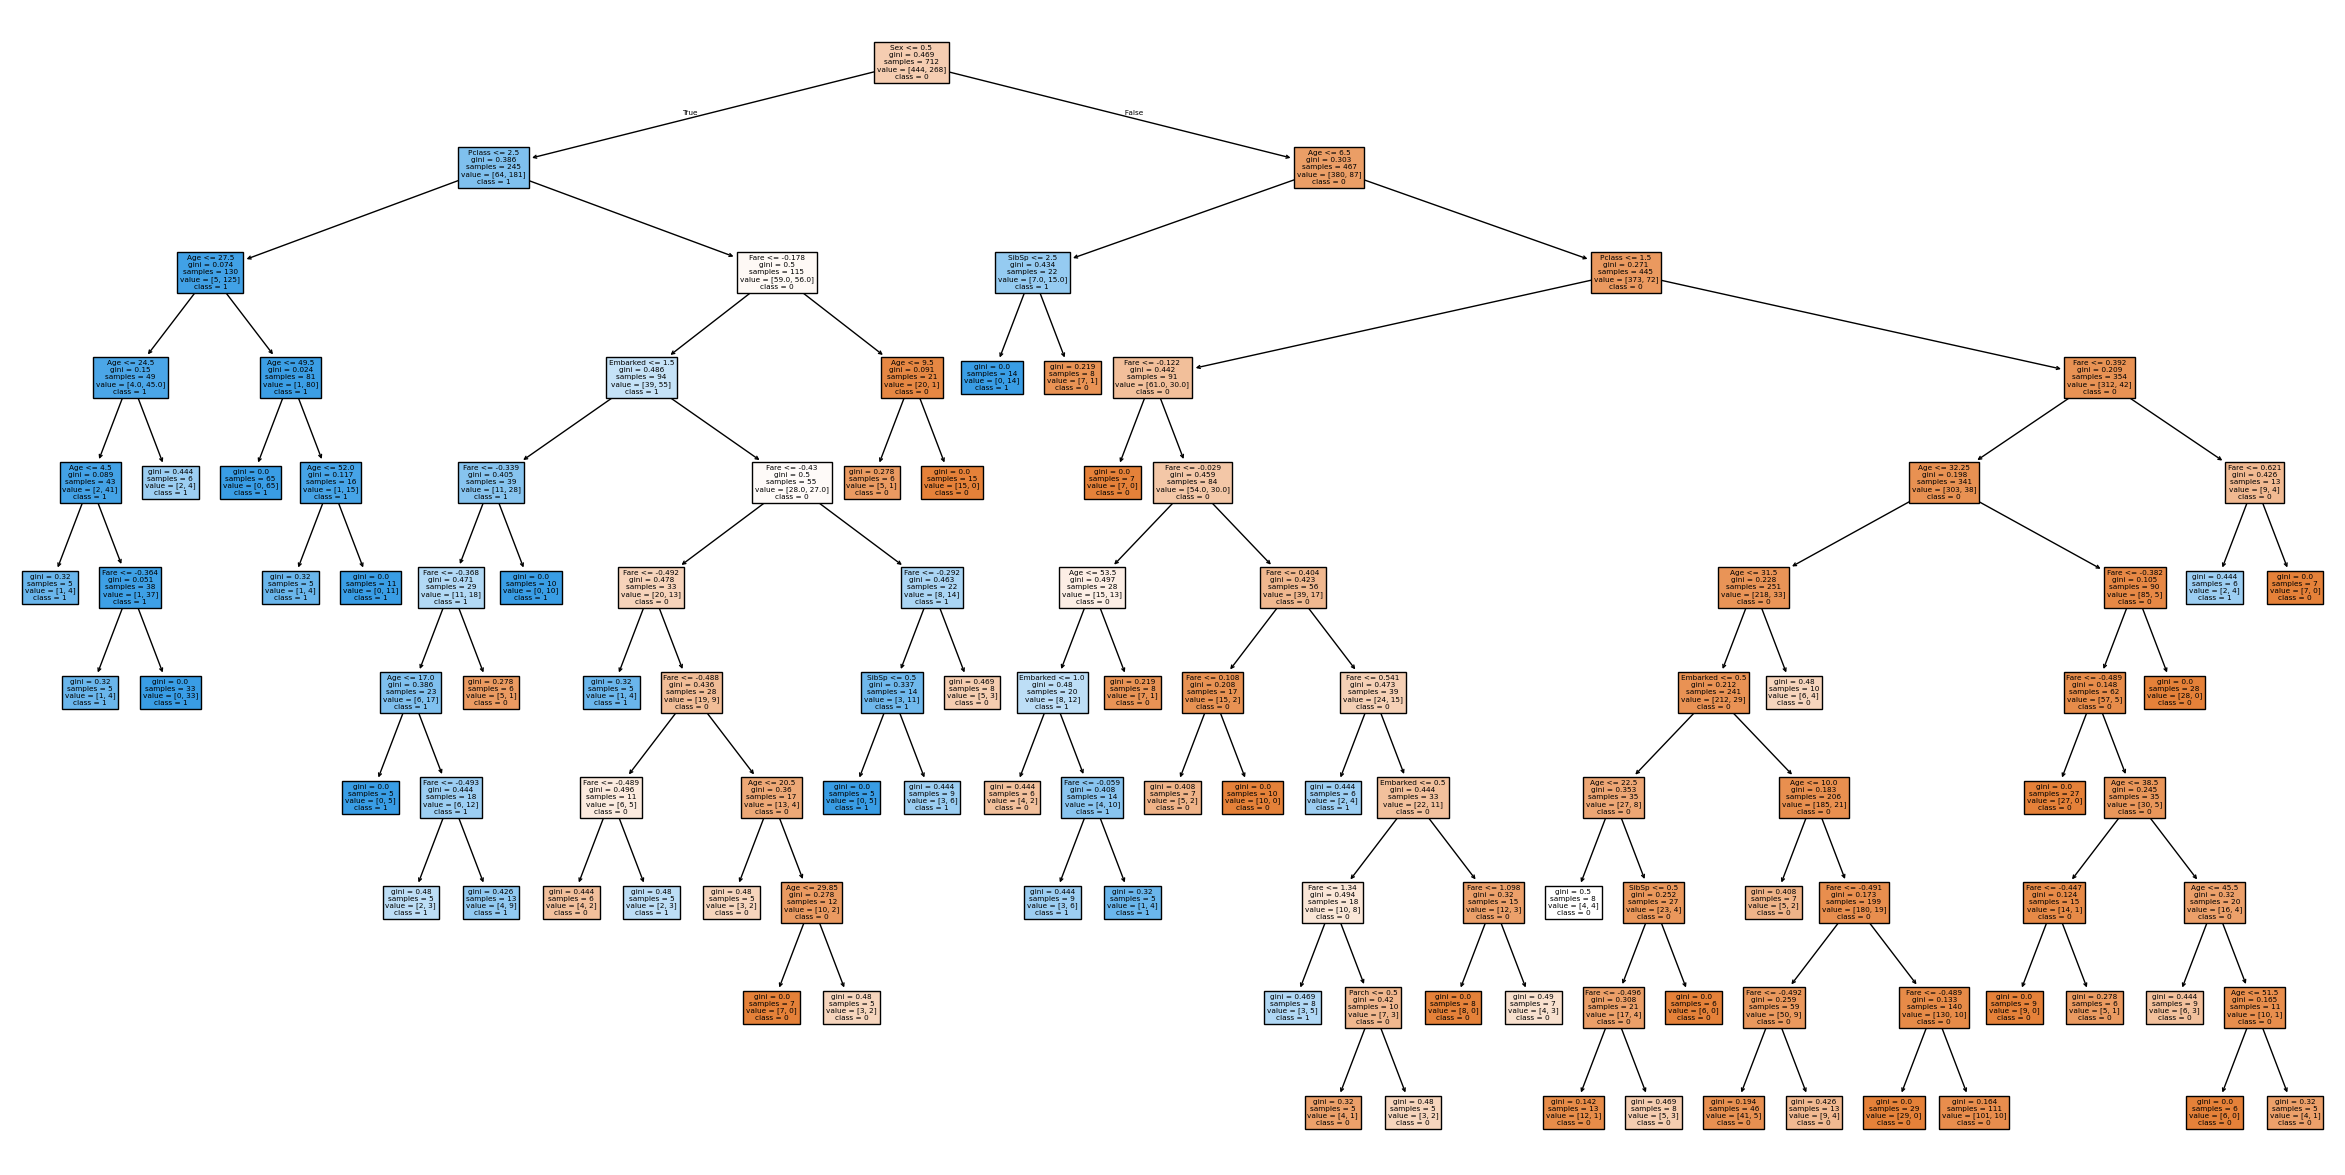

In [110]:
feature_names = X.columns
target_names = ["0", "1"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (model2, feature_names = feature_names, class_names = target_names, filled = True)

plt.savefig("decision_tree_visualization.png", format="png")
plt.show()

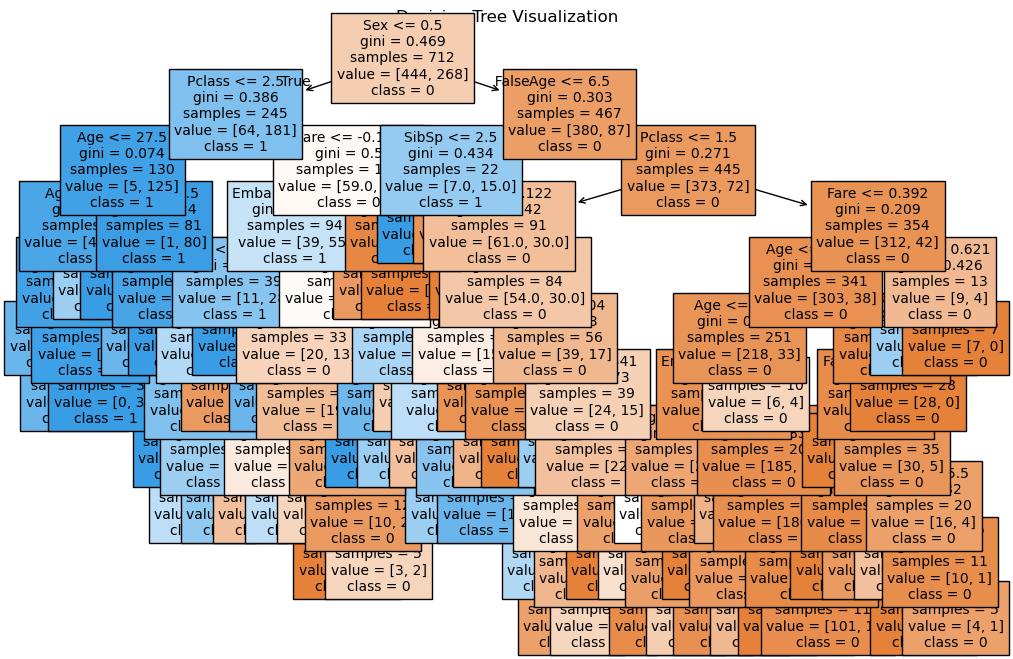

In [109]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = X.columns
class_names = ["0", "1"]

# Assuming clf is the trained DecisionTreeClassifier
plt.figure(figsize=(12, 8))
tree.plot_tree(model2, feature_names=feature_names, class_names=class_names, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")

# Save the plot to a file
plt.savefig("decision_tree_visualization.png", format="png")
plt.show()

In [89]:
# 7. Add min_samples_split and min_samples_leaf constraints and explain how it works
constraints = [
    {'min_samples_split': 2, 'min_samples_leaf': 1},
    {'min_samples_split': 10, 'min_samples_leaf': 5},
    {'min_samples_split': 20, 'min_samples_leaf': 10}
]

for constraint in constraints:
    model = DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=constraint['min_samples_split'],
        min_samples_leaf=constraint['min_samples_leaf'],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with min_samples_split={constraint['min_samples_split']} and min_samples_leaf={constraint['min_samples_leaf']}: {accuracy}")


Accuracy with min_samples_split=2 and min_samples_leaf=1: 0.8044692737430168
Accuracy with min_samples_split=10 and min_samples_leaf=5: 0.8491620111731844
Accuracy with min_samples_split=20 and min_samples_leaf=10: 0.7988826815642458


#### Explanation:
 - `min_samples_split`: The minimum number of samples required to split an internal node.
   Higher values prevent overfitting by limiting tree growth.
 - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
   Higher values result in more generalized tree structures.

## Best Model

In [100]:
model3 = DecisionTreeClassifier(
        max_depth=10,
        min_samples_split= 10,
        min_samples_leaf= 5,
        random_state=42
)

In [101]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [102]:
y_pred = model3.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree model:", accuracy)

Accuracy of Decision Tree model: 0.8491620111731844


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       105
           1       0.85      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



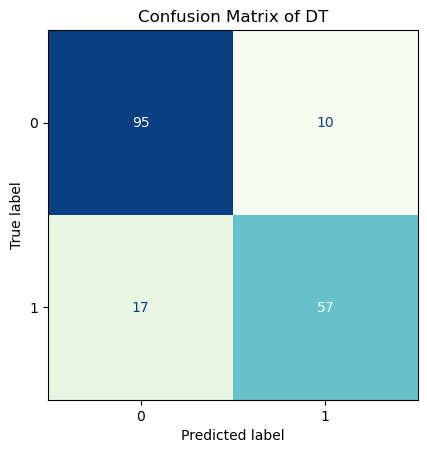

In [105]:
ConfusionMatrixDisplay.from_estimator(model3, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of DT')
plt.grid(False)